In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [132]:
candidates = pd.read_csv('data/score_board.csv')

In [133]:
candidates.head()

,id,year,gpa,maths_exam,art_exam,language_exam,social_activity,essay_score,interview_score,score,accepted
0,CS-1980-00001,1980,1.674275,0.082557,0.084508,0.008007,4,0.091328,0.012596,276,False
1,CS-1980-00002,1980,3.743429,0.898700,0.978949,0.937879,4,0.991515,0.999604,857,True
2,CS-1980-00003,1980,1.500251,0.075756,0.002541,0.216737,3,0.008463,0.001737,276,False
3,CS-1980-00004,1980,3.047625,0.993001,0.950673,0.763701,5,0.996858,0.949954,841,True
4,CS-1980-00005,1980,2.884417,0.396614,0.478490,0.180828,3,0.638742,0.182141,554,False


In [134]:
graduates = pd.read_csv('data/graduates.csv')

In [135]:
graduates.head()

,id,graduated
0,CS-1980-00002,False
1,CS-1980-00004,True
2,CS-1980-00007,True
3,CS-1980-00008,False
4,CS-1980-00012,True


In [136]:
students = pd.merge(candidates, graduates, on='id')
students = students.drop(['accepted', 'id'], axis=1)

In [137]:
students.head()

,year,gpa,maths_exam,art_exam,language_exam,social_activity,essay_score,interview_score,score,graduated
0,1980,3.743429,0.898700,0.978949,0.937879,4,0.991515,0.999604,857,False
1,1980,3.047625,0.993001,0.950673,0.763701,5,0.996858,0.949954,841,True
2,1980,2.897191,0.718591,0.941583,0.489207,4,0.980957,0.912487,811,True
3,1980,3.948450,0.953325,0.981074,0.914729,1,0.999489,0.997138,875,False
4,1980,3.939870,0.452506,0.952712,0.974585,4,0.940924,0.973076,790,True


Let's see if there are any null values:

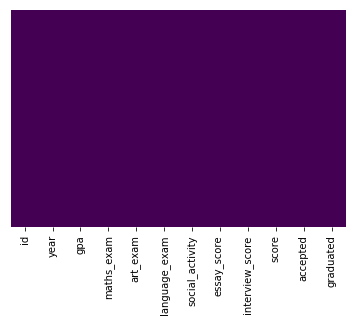

In [11]:
sbs.heatmap(students.isnull(), yticklabels=False, cbar=False, cmap='viridis')

There are none. There might be some nonsense values, though, so let's double check with .info() and .describe().

In [8]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7009 entries, 0 to 7008
Data columns (total 12 columns):
id                 7009 non-null object
year               7009 non-null int64
gpa                7009 non-null float64
maths_exam         7009 non-null float64
art_exam           7009 non-null float64
language_exam      7009 non-null float64
social_activity    7009 non-null int64
essay_score        7009 non-null float64
interview_score    7009 non-null float64
score              7009 non-null int64
accepted           7009 non-null bool
graduated          7009 non-null bool
dtypes: bool(2), float64(6), int64(3), object(1)
memory usage: 616.0+ KB


All the values are either numeric (great!) or Boolean (so they can be easily ported to numeric). The id object shouldn't, obviously, have any effect on the student status -- it's just a means of identification.

In [9]:
students.describe()

,year,gpa,maths_exam,art_exam,language_exam,social_activity,essay_score,interview_score,score
count,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000
mean,1998.801684,3.594377,0.851056,0.815081,0.814123,3.000143,0.934669,0.936532,853.515623
std,10.913043,0.329060,0.192624,0.224290,0.227928,1.421410,0.130732,0.131171,105.485478
min,1980.000000,1.850764,0.009699,0.002378,0.005865,1.000000,0.002230,0.004825,561.000000
25%,1989.000000,3.420754,0.801365,0.739754,0.733354,2.000000,0.941314,0.944835,783.000000
50%,1999.000000,3.676011,0.931921,0.912559,0.916296,3.000000,0.985999,0.986613,839.000000
75%,2008.000000,3.847615,0.979433,0.975063,0.976982,4.000000,0.996801,0.997046,925.000000
max,2016.000000,3.999989,0.999921,0.999858,0.999942,5.000000,0.999996,0.999996,1115.000000


A few observations based off this summary:
1. There don't seem to be any nonsensical (out of boundary values). It seems like it's a nice, clean data set.
2. The recruitment years span the 1980 - 2016 period. It would make sense to divide the students based off the recruitment year and see how each group performed since the exam difficulty may vary for each cohort.
3. The 25% percentile for both the essay score and the interview score fall above the 94% grade mark. This might suggest that the human evaluators are pretty lenient (is every candidate really that good?) and those scores alone might not be too helpful in my predictions, or it might be better to transform them using a binary threshold (below/above average result).
4. The average social activity score is three and the standard deviation for it is pretty big (1.42 on a 1-5 scale).

### Data visualization
Let's start by seeing how many people graduated (total).

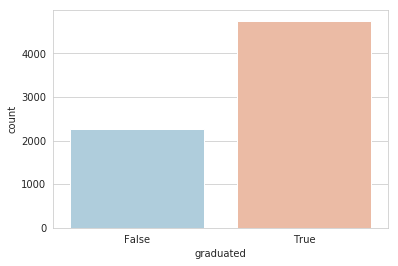

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='graduated', data=students, palette='RdBu_r')

This means that about 1 in 3 students has dropped out. There's no info about at what point they dropped out but from the fiscal point of view that sounds like a lot. Out of interest, let's see how this has changed across the years: 

In [26]:
#TODO

Do the scores follow a normal distribution?

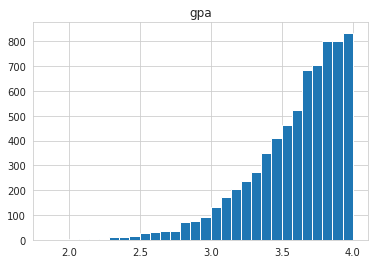

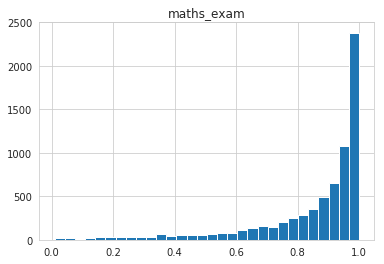

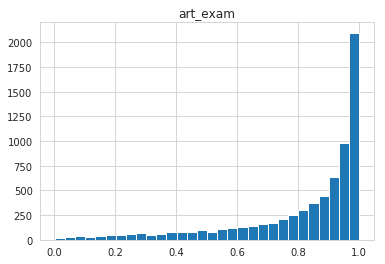

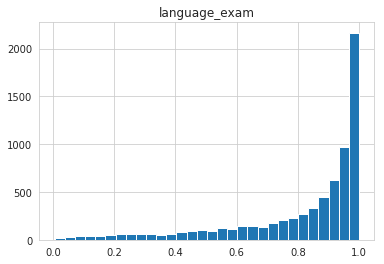

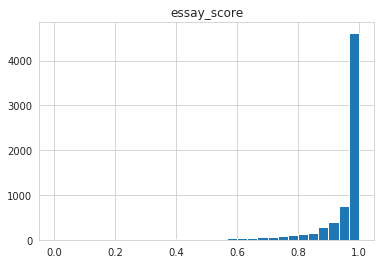

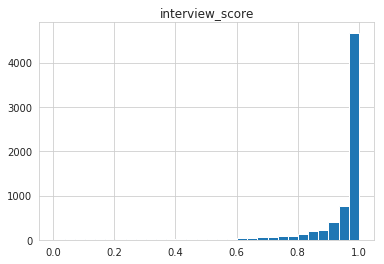

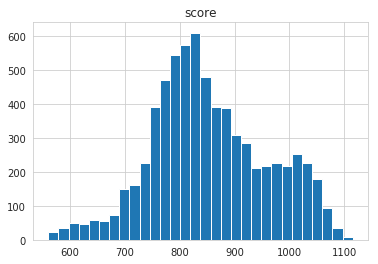

In [94]:
colnames = list(students.columns.values)[2:-2]
del colnames[4] # take only the column names for the scores

for index, col in enumerate(colnames):
    fig = plt.figure(figsize=(6,4))
    students[col].hist(bins=30)
    plt.title(col)
    plt.show()
    print('\n')

All but the total score are left-skewed. The total score looks more like a normal distribution, which is expected: if it was left-skewed as well it would mean most passing candidates were great at everything, and unicorns are rare. The plots for the interview score and the essay score illustrate my earlier remarks.

Let's see if there are any straightforward relationships in the data.

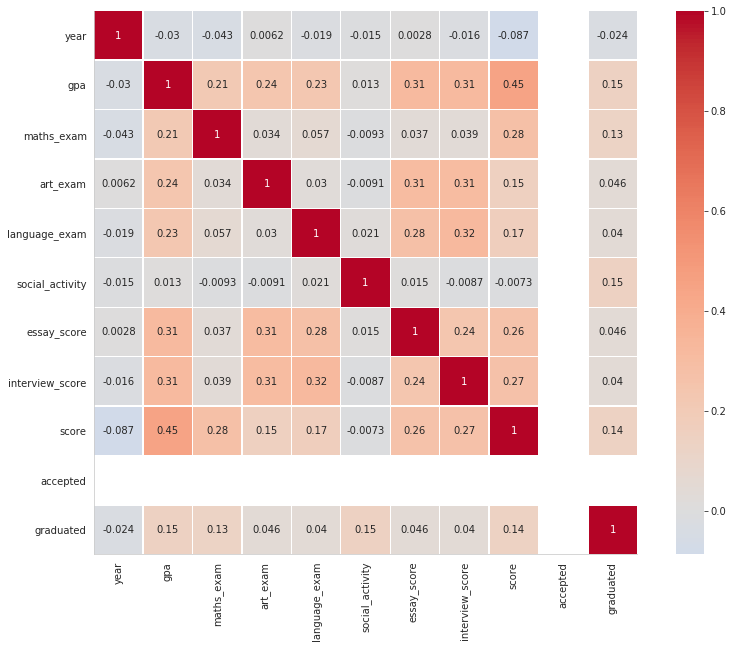

In [104]:
corr = students.corr()
grid = sns.heatmap(corr, center=0, square=True, linewidths=.3, annot=True, cmap='coolwarm')
sns.despine()
grid.figure.set_size_inches(14,10)
plt.show()

A few notes:
1. The strongest correlation is between the GPA and the score, but this is probably just an indicator that whatever the score formula, the GPA was a major contributor to it.
2. There is no strong correlation between any of the scores and one's graduation status, but there's a weak correlation (>0.1) between the graduation status and the GPA, Maths exam score, social activity score and the total score, respectively. This suggests that these factors might be the best predictors of one's graduation status (but not necessarily great).
3. There's a moderately weak (~0.3) correlation between the arts and language exam scores and the interview and essay scores, while there is pretty much no ~(0.0) correlation between the Maths exam score and the interview and essay scores. This may suggest that these two assessment forms favour those who are better at arts and languages (more outspoken and creative, perhaps?) to those who are good at Maths. (Of course, one can be good at all of them, but it's fairly rare.)
4. There's also a moderately weak (~0.3) correlation between the GPA and the essay and interview scores, but it's hard to elaborate on that further without knowing what exactly the candidates where graded on.

### Building a logistic regression model

The first model I'm going to use to try to fit the data uses logistic regression.

In [145]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(students.drop('graduated',axis=1), 
                                                    students['graduated'], test_size=0.30, 
                                                    random_state=101)

In [146]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/home/mkay313/Projects/uni-student-recommendation/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [147]:
predictions = logmodel.predict(X_test)

In [148]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.58      0.12      0.20       674
        True       0.70      0.96      0.81      1429

    accuracy                           0.69      2103
   macro avg       0.64      0.54      0.51      2103
weighted avg       0.66      0.69      0.61      2103



The first iteration provides some pretty weak scores. What happens if I leave only the columns that correlate with the graduation status AND drop the total score (since it depends on the other scores)?

In [149]:
students_corr = students.drop(['year', 'art_exam', 'language_exam', 'essay_score', 'interview_score', 'score'], axis=1)
students_corr.head()

,gpa,maths_exam,social_activity,graduated
0,3.743429,0.898700,4,False
1,3.047625,0.993001,5,True
2,2.897191,0.718591,4,True
3,3.948450,0.953325,1,False
4,3.939870,0.452506,4,True


In [150]:
X_train, X_test, y_train, y_test = train_test_split(students_corr.drop('graduated',axis=1), 
                                                    students_corr['graduated'], test_size=0.30, 
                                                    random_state=101)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.56      0.12      0.20       674
        True       0.70      0.96      0.81      1429

    accuracy                           0.69      2103
   macro avg       0.63      0.54      0.50      2103
weighted avg       0.65      0.69      0.61      2103



/home/mkay313/Projects/uni-student-recommendation/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


This actually made the model just a little bit worse! Looks like logistic regression might not work here.

### Building a decision tree / random trees model

In [151]:
from sklearn.tree import DecisionTreeClassifier

In [152]:
X_train, X_test, y_train, y_test = train_test_split(students_corr.drop('graduated',axis=1), 
                                                    students_corr['graduated'], test_size=0.30, 
                                                    random_state=101)

In [153]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [154]:
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

       False       0.33      0.34      0.34       674
        True       0.69      0.67      0.68      1429

    accuracy                           0.57      2103
   macro avg       0.51      0.51      0.51      2103
weighted avg       0.57      0.57      0.57      2103

[[232 442]
 [466 963]]


In [155]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [156]:
rfc_pred = rfc.predict(X_test)

In [157]:
print(confusion_matrix(y_test,rfc_pred))

[[ 188  486]
 [ 279 1150]]


In [158]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

       False       0.40      0.28      0.33       674
        True       0.70      0.80      0.75      1429

    accuracy                           0.64      2103
   macro avg       0.55      0.54      0.54      2103
weighted avg       0.61      0.64      0.62      2103



try out: logistic regression, decision trees / random forest, support vector machines, maybe a simple neural network?